In [1]:
## Collected Stop words
ENGLISH_STOP_WORDS = [
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"]


In [2]:
## Lemmatize each token of the given document
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]


In [3]:
## Load the data set 
import pandas as pd

Data_actual = pd.read_excel("CCC_TrainingData.xlsx")
Data_actual.head()

,ID,Match_ID,Over,Commentary,Over_Run_Total,Target
0,0,803965640511,49.6,and india reach 300. there has been a 300 in ...,4,Run_Bw_Wickets
1,1,803965640511,49.5,"slower ball, ashwin bunts this to leg for -99...",4,Run_Bw_Wickets
2,2,803965640511,49.4,"full toss on off, he just slogs, gets a thick...",4,Run_Bw_Wickets
3,3,803965640511,49.3,that's the closest you'll get to a hat-trick ...,4,Dot
4,4,803965640511,49.2,sohail is doing the sajda after bowling rahan...,4,Wicket


In [4]:
Data_actual[['Over','Over_Run_Total']].describe()

,Over,Over_Run_Total
count,101634.000000,101634.000000
mean,16.897594,6.357154
std,12.779404,4.377778
min,0.100000,0.000000
25%,6.600000,3.000000
50%,14.100000,6.000000
75%,24.500000,9.000000
max,49.600000,36.000000


In [5]:
Data = Data_actual.copy()
Data['code'], mapping = pd.factorize(Data['Target'])
y= Data['code']

#Data['Over_Run_Total2'] = [1 if x >= 6 else 0 for x in Data['Over_Run_Total']]
Data.drop('Target',axis=1,inplace=True)
Data.drop('code',axis=1,inplace=True)

In [6]:
# Normalizing the Over_Run_Total
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Data['Over_Run_Total3'] = scaler.fit_transform(Data['Over_Run_Total'].values.reshape(-1,1))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.33, random_state=42)

from scipy.sparse import hstack
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re

corpus = list(X_train["Commentary"])
corpus_length = []
for c in range(len(corpus)):
    corpus[c] = ' '.join(w for w in corpus[c].split() if not any(x.isdigit() for x in w))
    corpus[c] = ' '.join(re.sub(r'[^\d\w\s]','',w) for w in corpus[c].split() if len(w)>1)
    corpus_length.append(len(corpus[c].split()))
    
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),tokenizer=LemmaTokenizer())
X = vectorizer.fit_transform(corpus)

/home/u1364688/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [8]:
from sklearn.feature_selection import SelectKBest, chi2

feature_names2 = vectorizer.get_feature_names()

ch2 = SelectKBest(chi2, k=150000)
ch2.fit_transform(X, list(y_train))

# keep selected feature names
feature_names = [feature_names2[i-1] for i in ch2.get_support(indices=True)]

remove = list(set(feature_names2)-set(feature_names))

vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS+remove,ngram_range=(1,2),tokenizer=LemmaTokenizer())

X = vectorizer.fit_transform(corpus)
X = hstack([X,np.array(X_train['Over_Run_Total3']).reshape((len(X_train),1))])
#X = hstack([X,np.array(X_train['Over_Run_Total2']).reshape((len(X_train),1))])

corpus_t = list(X_test["Commentary"])
corpus_t_length = []
for c in range(len(corpus_t)):
    corpus_t[c] = ' '.join(w for w in corpus_t[c].split() if not any(x.isdigit() for x in w))
    corpus_t[c] = ' '.join(re.sub(r'[^\d\w\s]','',w) for w in corpus_t[c].split() if len(w)>1)
    corpus_t_length.append(len(corpus_t[c].split()))
    
X_t = vectorizer.transform(corpus_t)
X_t = hstack([X_t,np.array(X_test['Over_Run_Total3']).reshape((len(X_test),1))])
#X_t = hstack([X_t,np.array(X_test['Over_Run_Total2']).reshape((len(X_test),1))])

/home/u1364688/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aaaaaand', 'aaarrrgghh', 'aahs', 'aargh', 'aaron', 'ab', 'abandon', 'abandoned', 'abate', 'abbott', 'abd', 'abdomen', 'abds', 'abdur', 'abhishek', 'able', 'aborted', 'abound', 'absolutely', 'absurd', 'absurdly', 'abu', 'abuse', 'accelerator', 'accentuated', 'accepted', 'accepts', 'access', 'accolade', 'accompanying', 'accomplished', 'accord', 'according', 'accounted', 'accuracy', 'accused', 'accusingly', 'achieve', 'aching', 'acknowledged', 'acknowledgment', 'acrobatic', 'acrosstheline', 'act', 'acting', 'action', 'actionpacked', 'actually', 'actualy', 'ad', 'added', 'addition', 'additional', 'adeptly', 'adequate', 'adequately', 'adhered', 'adjacent', 'adjcaent', 'adjudged', 'adjust', 'adjusted', 'adjusts', 'admiration', 'admired', 'admiring', 'admit', 'advance', 'advanced', 'a

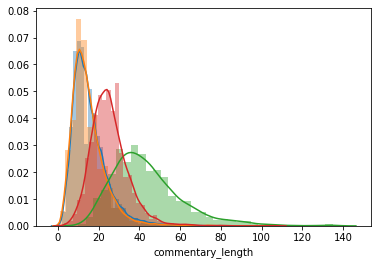

In [31]:
import seaborn as sns
%matplotlib inline
X_test_analysis = X_test.copy()
X_test_analysis['commentary_length'] = corpus_t_length 
X_test_analysis['target'] = y_test
for t in list(set(y_test)):
    sns.distplot(X_test_analysis['commentary_length'][X_test_analysis['target']==t],label=t)

In [9]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn import metrics

clf = MultinomialNB(alpha=.01)
clf.fit(X, list(y_train))
pred = clf.predict(X_t)

score = metrics.accuracy_score(list(y_test), pred)
print("MultinomialNB accuracy:   %0.3f" % score)

clf = BernoulliNB(alpha=.01)
clf.fit(X, list(y_train))
pred = clf.predict(X_t)

score = metrics.accuracy_score(list(y_test), pred)
print("BernoulliNB accuracy:   %0.3f" % score)

clf = ComplementNB(alpha=.1)
clf.fit(X, list(y_train))
pred = clf.predict(X_t)

score = metrics.accuracy_score(list(y_test), pred)
print("ComplementNB accuracy:   %0.3f" % score)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=100, solver='lbfgs',multi_class='multinomial').fit(X, list(y_train))
pred = clf.predict(X_t)

score = metrics.accuracy_score(list(y_test), pred)
print("Logistic Regression accuracy:   %0.3f" % score)
#X_t.shape,X.shape
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

pred = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y_train).predict(X_t) 
score = metrics.accuracy_score(list(y_test), pred)
print("SVC accuracy:   %0.3f" % score)

MultinomialNB accuracy:   0.670
BernoulliNB accuracy:   0.692
ComplementNB accuracy:   0.662


/home/u1364688/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic Regression accuracy:   0.731
SVC accuracy:   0.728


In [10]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 5      
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(X)

In [11]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i-1] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words=10)


Topics in NMF model (Frobenius norm):
Topic #0: ãâ la balcony sprung track widde land shoritsh worked packing past timbo longoffs muralitharans straigh fielder vusi sibanda
Topic #1: lenght tapped shoritsh worked short lenght length balbirnie good lengh goneswanns brings length outisde balcony ãâ la length defence
Topic #2: defenceand wa foor noball defended flintoff length defence outside defence defended bowled bowledim russell ãâ la ball defence defended foot
Topic #3: drivemooney good outside drilling driven longoff driven longishon longlong time longoffs muralitharans ãâ la driven menace midmovement thud driven midoff
Topic #4: outsde badree length outisde poin leeway stepping outside leeway ãâ la customer ball outfield outside drilling outside plonk

